# Final Project - Introduction to Data Science

**Team members:**

1. Nguyễn Hoàng Trung Kiên (Leader) - 22127478

2. Quách Trần Quán Vinh - 22127460

3. Ngô Hải Bằng - 22127460

## 0. Prerequisites

### Import libraries

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

### Read data

In [11]:
X = pd.read_csv('houses_after_preprocessing.csv')
y = X['Price']
X = X.drop(columns=['Price'])

### Split data into train test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Data modeling

In this project, we decided to benchmark 5 following regression models:
- **Linear Regression**
- **Lasso Regression**
- **Support Vector Regression**
- **Random Forest Regressor**
- **Multilayer Perception**

In [13]:
metrics = {}
models = {}

### 1.1. Linear Regression

In [14]:
models['Linear Regression'] = LinearRegression()
models['Linear Regression'].fit(X_train, y_train)
y_pred = models['Linear Regression'].predict(X_test)

metrics['Linear Regression'] = (mean_squared_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

### 1.2. Lasso Regression

In [15]:
params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(lasso, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lasso.fit(X_train, y_train)

models['Lasso'] = grid_lasso.best_estimator_
y_pred = models['Lasso'].predict(X_test)
metrics['Lasso'] = (mean_squared_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

print('Lasso best params:', grid_lasso.best_params_)

Lasso best params: {'alpha': 100}


### 1.3. Support Vector Regression

In [16]:
params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svr = SVR()
grid_svr = GridSearchCV(svr, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr.fit(X_train, y_train)

models['SVR'] = grid_svr.best_estimator_
y_pred = models['SVR'].predict(X_test)
metrics['SVR'] = (mean_squared_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

print('SVR best params:', grid_svr.best_params_)

SVR best params: {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}


### 1.4. Random Forest Regressor

In [17]:
params = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}

rf = RandomForestRegressor()
grid_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

models['Random Forest'] = grid_rf.best_estimator_
y_pred = models['Random Forest'].predict(X_test)
metrics['Random Forest'] = (mean_squared_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

print('Random Forest best params:', grid_rf.best_params_)

Random Forest best params: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 200}


### 1.5. Multilayer Perceptron (MLP Regressor)

In [18]:
params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}

mlp = MLPRegressor(max_iter=1000)
grid_mlp = GridSearchCV(mlp, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp.fit(X_train, y_train)

models['MLP'] = grid_mlp.best_estimator_
y_pred = models['MLP'].predict(X_test)
metrics['MLP'] = (mean_squared_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred))

print('MLP best params:', grid_mlp.best_params_)

MLP best params: {'activation': 'identity', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'invscaling'}


## 2. Model evaluation

<Axes: >

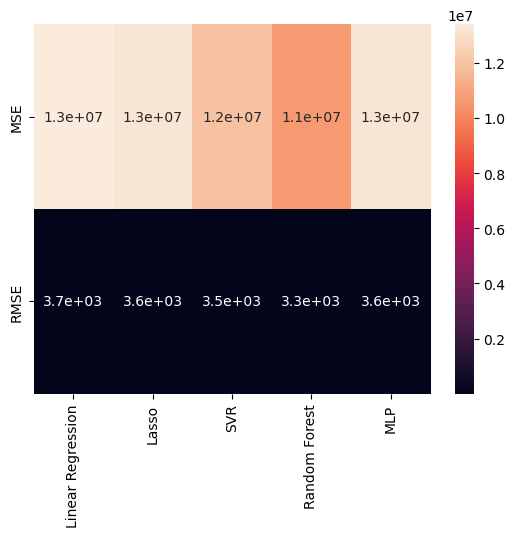

In [24]:
metrics_df = pd.DataFrame(metrics, index=['MSE', 'RMSE'])

sns.heatmap(metrics_df, annot=True)

## Comparison
### MSE
- It measures the square root of the average discrepancies between a dataset's actual values and projected values.
- The lower MSE values indicate the better model performance.
### RMSE
- Similar to the MSE value, it is usually used to measure the accuracy or goodness of fit of a predictive model, especially when the predictions are continuous numerical values.
- The lower RMSE values indicate the better predictions.

### Model recommendation
#### 1. **Random Forest**:
- Best performance in both MSE and RMSE.
- Likely benefits from its ensemble nature, reducing overfitting while capturing complex relationships.
#### 2. **SVR**:
- Close second in RMSE and better than basic linear models.
- Good at handling nonlinear relationships but may be computationally expensive for large datasets.
#### 3. **Lasso and MLP**:
- Similar performance, with RMSE slightly higher than Random Forest and SVR.
- May have struggled with feature selection (Lasso) or optimization (MLP).
#### 4. **Linear Regression**:
- Performs the worst, likely due to its inability to capture nonlinear relationships and interactions.